---
CSC 268 Lab 16:  Seam Carving
---

This lab introduces you to an implementation of ***seam carving***, a method for finding the lowest-energy path through an image.  This can be used for content-aware image resizing, as well as for image compositing.

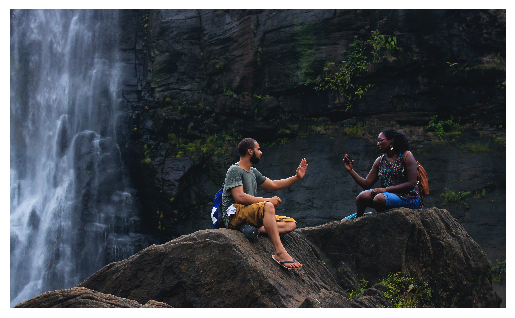

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio.v2 import imread, imwrite
from scipy.ndimage import convolve
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img,cmap=None):
    plt.imshow(img,cmap=cmap,interpolation='none')
    plt.axis('off')
    plt.show()
    
falls = imread('falls.jpg').astype(np.float32)/255.0
imshow(falls)

(3220, 5344, 3) float32


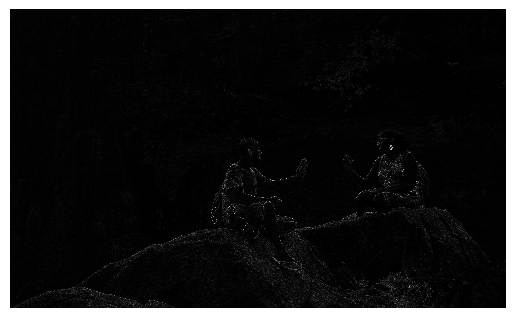

In [2]:
print(falls.shape,falls.dtype)
df = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
gx = convolve(falls,df.reshape((3,3,1)))
gy = convolve(falls,(df.T).reshape((3,3,1)))
E = (np.abs(gx)+np.abs(gy)).sum(axis=2)
imshow(E)

In [3]:
'''#E = np.random.randint(0,5,(4,5))
#print(E)
r,c = E.shape
parent_L = np.pad(np.array(range(c-1)),((1,0)),mode='edge')
parent_C = np.array(range(c))
parent_R = np.pad(np.array(range(1,c)),((0,1)),mode='edge')
parents = np.stack((parent_C,parent_L,parent_R),axis=0)
#print(parents)
M = np.zeros_like(E)
M[0,:] = E[0,:]
back = np.zeros_like(E)
for i in range(1,r):
    choice = np.stack((M[i-1,parent_C],M[i-1,parent_L],M[i-1,parent_R]),axis=1)
    pick = np.argmin(choice,axis=1)
    back[i-1,:] = parents[pick,np.array(range(c))]
    #print(choice.shape,pick.shape)
    M[i,:] = E[i,:]+np.min(choice,axis=1)
back[i,:] = np.array(range(c))
print(M)
print(back)
# reconstruct backward paths
back[i,:] = np.array(range(c))
for i in range(r-2,-1,-1):
    print(i)
    back[i,:] = back[i,back[i+1,:]]
print(back)'''

"#E = np.random.randint(0,5,(4,5))\n#print(E)\nr,c = E.shape\nparent_L = np.pad(np.array(range(c-1)),((1,0)),mode='edge')\nparent_C = np.array(range(c))\nparent_R = np.pad(np.array(range(1,c)),((0,1)),mode='edge')\nparents = np.stack((parent_C,parent_L,parent_R),axis=0)\n#print(parents)\nM = np.zeros_like(E)\nM[0,:] = E[0,:]\nback = np.zeros_like(E)\nfor i in range(1,r):\n    choice = np.stack((M[i-1,parent_C],M[i-1,parent_L],M[i-1,parent_R]),axis=1)\n    pick = np.argmin(choice,axis=1)\n    back[i-1,:] = parents[pick,np.array(range(c))]\n    #print(choice.shape,pick.shape)\n    M[i,:] = E[i,:]+np.min(choice,axis=1)\nback[i,:] = np.array(range(c))\nprint(M)\nprint(back)\n# reconstruct backward paths\nback[i,:] = np.array(range(c))\nfor i in range(r-2,-1,-1):\n    print(i)\n    back[i,:] = back[i,back[i+1,:]]\nprint(back)"

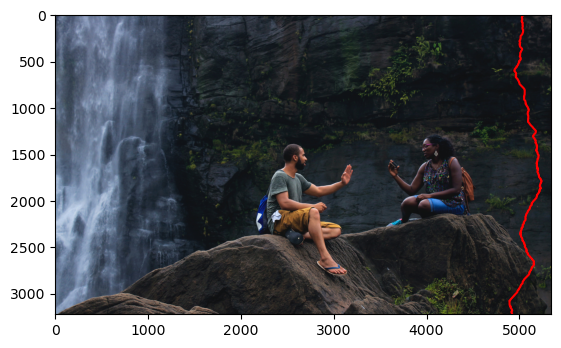

In [4]:
def seams(E):
    r,c = E.shape
    parent_L = np.pad(np.array(range(c-1)),((1,0)),mode='edge')
    parent_C = np.array(range(c))
    parent_R = np.pad(np.array(range(1,c)),((0,1)),mode='edge')
    parents = np.stack((parent_C,parent_L,parent_R),axis=0)
    M = np.zeros_like(E)
    M[0,:] = E[0,:]
    back = np.zeros_like(E,dtype=np.int32)
    for i in range(1,r):
        choice = np.stack((M[i-1,parent_C],M[i-1,parent_L],M[i-1,parent_R]),axis=1)
        pick = np.argmin(choice,axis=1)
        back[i-1,:] = parents[pick,np.array(range(c))]
        #print(choice.shape,pick.shape)
        M[i,:] = E[i,:]+np.min(choice,axis=1)
        
    # reconstruct backward paths
    back[i,:] = np.array(range(c))
    for i in range(r-2,-1,-1):
        #print(i,back.dtype)
        back[i,:] = back[i,back[i+1,:]]
    return M[-1,:],back

M,B = seams(E)
s = M.argmin()
plt.imshow(falls)
plt.plot(B[:,s],np.array(range(E.shape[0])),'r')
plt.show()

In [5]:
'''def hseams(E):
    M,B = seams(E.T)
    return M,B.T

Mh,Bh = hseams(E)
s = Mh.argmin()
plt.imshow(falls)
plt.plot(np.array(range(E.shape[1])),B[s,:],'r')
plt.show()'''
None

"def hseams(E):\n    M,B = seams(E.T)\n    return M,B.T\n\nMh,Bh = hseams(E)\ns = Mh.argmin()\nplt.imshow(falls)\nplt.plot(np.array(range(E.shape[1])),B[s,:],'r')\nplt.show()"

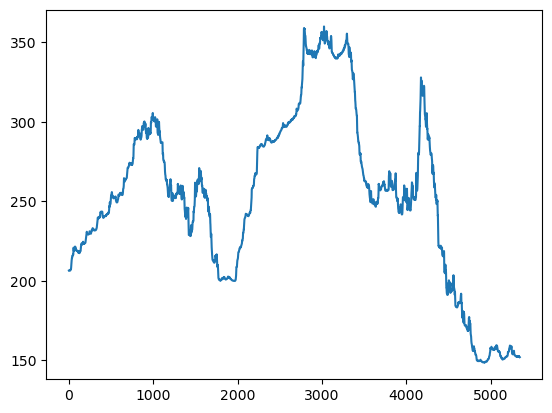

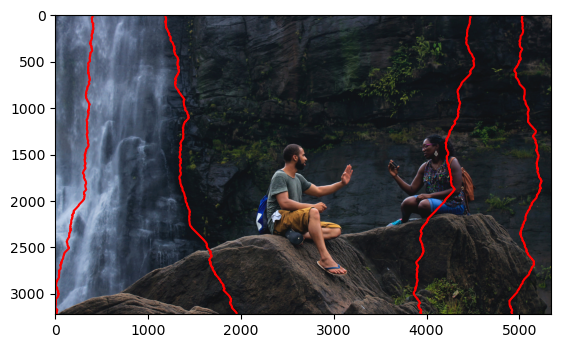

In [19]:
'''# most seams share paths
sM = np.argsort(M)
print(M[sM])
print(sM[:200])
plt.imshow(falls)
for i in range(200):
    plt.plot(B[:,sM[i]],np.array(range(E.shape[0])),'-')
plt.show()'''
plt.plot(M)
plt.show()

s1 = M.argmin()
s2 = M[:1000].argmin()
s3 = M[:3000].argmin()
plt.imshow(falls)
plt.plot(B[:,s1],np.array(range(E.shape[0])),'-')
plt.plot(B[:,s2],np.array(range(E.shape[0])),'-')
plt.plot(B[:,s3],np.array(range(E.shape[0])),'-')
plt.show()

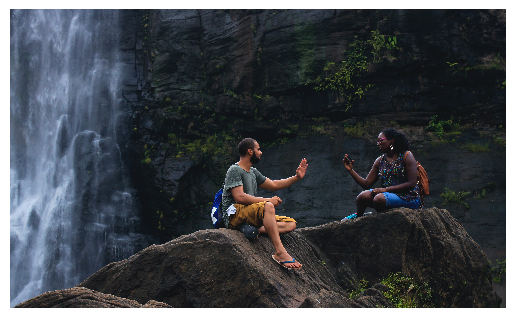

In [15]:
def removeSeam(img,s):
    '''removes a given seam from the image'''
    img2 = img[:,:-1,:]  # allocate one less column
    for i in range(img.shape[0]):
        img2[i,s[i]:,:] = img[i,s[i]+1:,:]  # copy portion after seam
    return img2

falls2 = removeSeam(falls,B[:,s])
imshow(falls2)

In [7]:
(
print(E.max())
M = np.pad(E,(1,1),constant_values=24)
print(E.shape,M.shape)
back = np.zeros(E.shape)
r,c = E.shape
for i in range(1, r):
    for j in range(0, c):
        idx = np.argmin(M[i,j:j+3])
        back[i,j] = j+idx-1
        M[i,j] = np.amin(M[i,j:j+3])
    print(i)
imshow(M)

SyntaxError: '(' was never closed (3855900352.py, line 1)

### Sources

https://karthikkaranth.me/blog/implementing-seam-carving-with-python/
Photo by Nandhu Kumar: https://www.pexels.com/photo/man-and-woman-talking-near-waterfalls-3280559/